# ACSE-3 (Numerical Methods) <a class="tocSkip">

## Lecture 1: Interpolation and Curve Fitting <a class="tocSkip">
    
### Homework Exercises - Solutions <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Fitting-two-data-points" data-toc-modified-id="Homework---Fitting-two-data-points-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Fitting two data points</a></span><ul class="toc-item"><li><span><a href="#Solution---Fitting-two-data-points" data-toc-modified-id="Solution---Fitting-two-data-points-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Solution - Fitting two data points</a></span></li></ul></li><li><span><a href="#Homework---Newton-polynomial" data-toc-modified-id="Homework---Newton-polynomial-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - Newton polynomial</a></span><ul class="toc-item"><li><span><a href="#Solution---Newton-polynomial" data-toc-modified-id="Solution---Newton-polynomial-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Solution - Newton polynomial</a></span></li></ul></li><li><span><a href="#Homework---Error-bound-for-polynomial-interpolation-of-the-Runge-function-[$\star$]" data-toc-modified-id="Homework---Error-bound-for-polynomial-interpolation-of-the-Runge-function-[$\star$]-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Error bound for polynomial interpolation of the Runge function [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution----Error-bound-for-polynomial-interpolation-of-the-Runge-function" data-toc-modified-id="Solution----Error-bound-for-polynomial-interpolation-of-the-Runge-function-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Solution -  Error bound for polynomial interpolation of the Runge function</a></span></li></ul></li><li><span><a href="#Homework---Chebyshev-interpolation-[$\star$]" data-toc-modified-id="Homework---Chebyshev-interpolation-[$\star$]-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - Chebyshev interpolation [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---Chebyshev-interpolation" data-toc-modified-id="Solution---Chebyshev-interpolation-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Solution - Chebyshev interpolation</a></span></li></ul></li><li><span><a href="#Homework---Chebyshev-polynomials-as-basis-functions-[$\star\star$]" data-toc-modified-id="Homework---Chebyshev-polynomials-as-basis-functions-[$\star\star$]-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Chebyshev polynomials as basis functions [$\star\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---Chebyshev-polynomials-as-basis-functions" data-toc-modified-id="Solution---Chebyshev-polynomials-as-basis-functions-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Solution - Chebyshev polynomials as basis functions</a></span></li></ul></li><li><span><a href="#Homework---Cubic-spline-interpolation-[$\star\star$]" data-toc-modified-id="Homework---Cubic-spline-interpolation-[$\star\star$]-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - Cubic spline interpolation [$\star\star$]</a></span><ul class="toc-item"><li><span><a href="#Cubic-spline----derivation" data-toc-modified-id="Cubic-spline----derivation-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Cubic spline -  derivation</a></span></li><li><span><a href="#Solution---Cubic-spline-interpolation" data-toc-modified-id="Solution---Cubic-spline-interpolation-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Solution - Cubic spline interpolation</a></span></li></ul></li></ul></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# as this lecture is about interpolation we will make use of this library
import scipy.interpolate as si

# some default font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Homework

## Homework - Fitting two data points

We stated in class that:


The polynomial that fits the two data points $\{(x_0,y_0),(x_1,y_1)\}$ is clearly the linear function given by

$$ y = f(x) \equiv a_0 + a_1\,x \;\;\;\;\; \text{i.e. the degree one polynomial:} \;\;\;\;\; y = P_1(x) \equiv a_0 + a_1\,x$$

where through substitution we arrive at  two simultaneous equations (or a $2\times 2$ matrix system) which can fairly easily be solved by substituting one equation into the other to conclude that

$$ a_0 = y_0 - \frac{y_1-y_0}{x_1-x_0}x_0, \;\;\;\;\;\;\;\; a_1 = \frac{y_1-y_0}{x_1-x_0}. $$

Form the set of two simultaneous equations and solve by hand to derive this solution for the coefficients.

### Solution - Fitting two data points

We have two pieces of information - let's write these out:

\begin{align*}
(1) & \;\;\;\; y_0 = a_0 + a_1\,x_0, \\[5pt]
(2) & \;\;\;\; y_1 = a_0 + a_1\,x_1. 
\end{align*}

We are assuming we know the $x$'s and the $y$'s, and we want to find the $a$'s.

There are multiple ways we could solve this, one way is to rearrange the second equation to give an expression for $a_1$ in terms of $a_0$:

$$ a_0 = y_1 - a_1x_1,$$

and substitute this into the first equation:

$$ y_0 = a_0 + a_1\,x_0 = y_1 - a_1x_1 + a_1\,x_0 = y_1 - (x_1-x_0)a_1,$$

which we can solve for $a_1$:

$$ a_1 = \frac{y_1 - y_0}{x_1 - x_0}.$$

We can now substitute this into either one of the two original equations to find $a_0$ - consider (1) for example:

$$y_0 = a_0 + a_1\,x_0 = a_0 + \frac{y_1 - y_0}{x_1 - x_0} x_0.$$

Rearranging we get the solution we want:

$$a_0 = y_0 - \frac{y_1 - y_0}{x_1 - x_0} x_0.$$

Note that this is equivalent to forming and solving the linear system

$$
\begin{pmatrix}
1 & x_0  \\
1 & x_1 
\end{pmatrix}
\begin{pmatrix}
a_0\\
a_1
\end{pmatrix}
=
\begin{pmatrix}
y_0\\
y_1
\end{pmatrix}.
$$

## Homework - Newton polynomial

From the lecture we defined the Newton polynomial as

$$ P_N(x) = a_0 +(x-x_0)a_1 + (x-x_0)(x-x_1)a_2 + \cdots + (x-x_0)(x-x_1)\ldots(x-x_N)a_N,$$

where $a_0, a_1, \ldots, a_N$ are our $N+1$ free parameters we need to find using the $N+1$ pieces of information we have in the given data.

We introduced the divided difference notation

\begin{alignat*}{2}
\Delta y_i &= \frac{y_i-y_0}{x_i-x_0},\;\;    && i=1,2,\ldots, N,\\[10pt]
\Delta^2 y_i &= \frac{\Delta y_i-\Delta y_1}{x_i-x_1},\;\;    && i=2, 3,\ldots, N,\\[10pt]
&\vdots\\[5pt]
\Delta^N y_N &= \frac{\Delta^{N-1} y_N-\Delta^{N-1} y_{N-1}}{x_N-x_{N-1}},
\end{alignat*}


and saw that the unknown coefficients $a$ are given by


$$a_0=y_0,\;\;\;\;\; a_1 = \Delta y_1, \;\;\;\;\; a_2 = \Delta^2 y_2, \;\;\;\;\; \ldots \;\;\;\;\; a_N = \Delta^N y_N.$$


Based upon the following pseudo code implement functions to (1) calculate the coefficients of the Newton polynomial, and (2) evaluate it for the purposes of plotting. Check visually that your plotted curve of the interpolant agrees with what we saw for the Lagrange polynomial (obtained either with SciPy our our own implementation: `Lagrange_basis_poly` and `Lagrange_interp_poly`) and passes through our data points - use the same data made up of 6 points we used in the lecture:

``` Python
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])
```

*Pseudo-code / code skeleton:*

``` Python
def calculate_newton_poly_coeffs(xi, yi):
    """ Evaluate the coefficients a_i recursively using Newton's method
    """
    # initialise the array 'a' with yi, but take a copy to ensure we don't
    # overwrite our yi data!
    a = yi.copy()

    # we have N+1 data points, and so
    N = len(a) - 1

    # for each k, we compute Δ^k y_i from the a_i = Δ^(k-1) y_i of the previous iteration:
    for k in range(1, N+1):
        # but only for i>=k
        for i in range(k, N+1):
            a[i] = *** you need to fill in the maths here ***

    return a
    
    
def eval_newton_poly(a, xi, x):
    """ Function to evaluate the Newton polynomial
    at x, given the data point xi and the polynomial coeffs a
    """
    N = len(xi) - 1  # polynomial degree
    # recursively build up polynomial evaluated at xx
    P = a[N]
    for k in range(1, N+1):
        P = *** you need to fill in the maths here ***
        
    return P
    
# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

# add a small margin 
ax1.margins(0.1)

# Evaluate the coefficients of the Newton polynomial
a = calculate_newton_poly_coeffs(xi, yi)
# Evaluate the polynomial at high resolution and plot
x = np.linspace(0.4, 9.1, 100)
ax1.plot(x, eval_poly(a, xi, x), 'b', label='Newton poly')

# Overlay raw data
plot_raw_data(xi, yi, ax1)
ax1.set_title('Newton interpolating polynomial (our implementation)', fontsize=16)

# Add a legend
ax1.legend(loc='best', fontsize=14);
```

### Solution - Newton polynomial

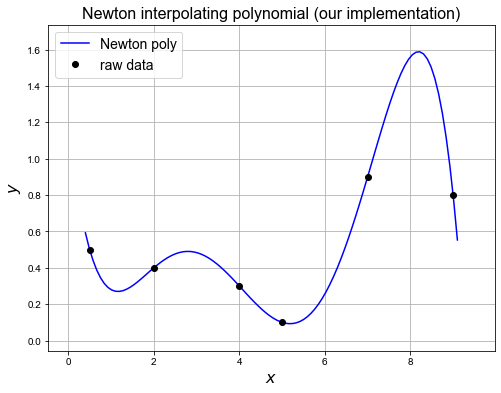

In [2]:
# consider the above example data again
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])


def calculate_newton_poly_coeffs(xi, yi):
    """ Evaluate the coefficients a_i recursively using Newton's method
    """
    # initialise the array 'a' with yi, but take a copy to ensure we don't
    # overwrite our yi data!
    a = yi.copy()

    # we have N+1 data points, and so
    N = len(a) - 1

    # for each k, we compute Δ^k y_i from the a_i = Δ^(k-1) y_i of the previous iteration:
    for k in range(1, N+1):
        # but only for i>=k
        for i in range(k, N+1):
            a[i] = (a[i] - a[k-1])/(xi[i]-xi[k-1])

    return a


# Given the coefficients a, and the data locations x,
# define a function to evaluate the Newton polynomial
# at locations given in the array xx.
# NB. this is just an evaluation of the P_n(x) = ... formula
# given at the start of this section.

def eval_newton_poly(a, xi, x):
    """ Function to evaluate the Newton polynomial
    at x, given the data point xi and the polynomial coeffs a
    """
    N = len(xi) - 1  # polynomial degree
    # recursively build up polynomial evaluated at xx
    P = a[N]
    for k in range(1, N+1):
        P = a[N-k] + (x - xi[N-k])*P
    return P


# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

# add a small margin 
ax1.margins(0.1)

# Evaluate the coefficients of the Newton polynomial
a = calculate_newton_poly_coeffs(xi, yi)
# Evaluate the polynomial at high resolution and plot
x = np.linspace(0.4, 9.1, 100)
ax1.plot(x, eval_newton_poly(a, xi, x), 'b', label='Newton poly')

def plot_raw_data(xi, yi, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(xi, yi, 'ko', label='raw data')
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.grid(True)
    
# Overlay raw data
plot_raw_data(xi, yi, ax1)
ax1.set_title('Newton interpolating polynomial (our implementation)', fontsize=16)

# Add a legend
ax1.legend(loc='best', fontsize=14);

## Homework - Error bound for polynomial interpolation of the Runge function [$\star$]

In ACSE-2 we introduced SymPy - a library that can be used for symbolic mathematical operations.

To use it to calculate and plot the derivatives of the Runge function for example we can do something like

``` Python
import sympy

x = sympy.Symbol('x', real=True)
f = 1. / (1. + 25. * x**2)
print("f(x) = ", (sympy.simplify(f)))
f_ = sympy.lambdify(x,f)

dfdx = sympy.diff(f, x) 
print("f'(x) = ", (sympy.simplify(dfdx)))
dfdx_ = sympy.lambdify(x,dfdx)

dfdx2 = sympy.diff(dfdx, x) 
print("f''(x) = ", (sympy.simplify(dfdx2)))
dfdx2_ = sympy.lambdify(x,dfdx2)

dfdx3 = sympy.diff(dfdx2, x) 
print("f'''(x) = ", (sympy.simplify(dfdx3)))
dfdx3_ = sympy.lambdify(x,dfdx3)

xf = np.linspace(-1.0, 1.0, 1000)

fig, ax = plt.subplots(1, 4, figsize=(12, 4))
fig.tight_layout(w_pad=3, h_pad=4)
ax[0].plot(xf, f_(xf), 'b'); ax[0].set_title("f(x)")
ax[1].plot(xf, dfdx_(xf), 'b'); ax[1].set_title("f'(x)")
ax[2].plot(xf, dfdx2_(xf), 'b'); ax[2].set_title("f''(x)")
ax[3].plot(xf, dfdx3_(xf), 'b'); ax[3].set_title("f'''(x)")
```

and to compute an $(N+1)$-st derivative, say, we could do something like

``` Python
N = 10
df = f
for i in range(N+1):
    df = sympy.diff(df, x) 
```

Play around a bit with SymPy and try plotting our error bound 

$$\left| f(x) - P_N(x) \right| \le \frac{1}{(N+1)!}\, M\, \left|\Psi_N(x)\right|
\;\;\;\;\;\;\text{where}\;\;\;\;\;\;
M:=\max_{x\in(a,b)}\, \left| f^{(N+1)}(x) \right|,$$ 

you should see that as you increase $N$ the error bound gets larger quite rapidly and more and more focused at the end points of our interval.

### Solution -  Error bound for polynomial interpolation of the Runge function

f(x) =  1.0/(25.0*x**2 + 1.0)
f'(x) =  -50.0*x/(25.0*x**2 + 1.0)**2
f''(x) =  (3750.0*x**2 - 50.0)/(25.0*x**2 + 1.0)**3
f'''(x) =  x*(15000.0 - 375000.0*x**2)/(25.0*x**2 + 1.0)**4
f^{(20)}(x) =  1500000000.0*x**3/(25.0*x**2 + 1.0)**6 - 11250000.0*x/(25.0*x**2 + 1.0)**4
f^{(20)}(x) =  (11250000000000.0*x**6 - 562500000000.0*x**4*(25.0*x**2 + 1.0) + 6750000000.0*x**2*(25.0*x**2 + 1.0)**2 - 11250000.0*(25.0*x**2 + 1.0)**3)/(25.0*x**2 + 1.0)**7
f^{(20)}(x) =  (1.1694375e+29*x**12 - 1.28638125e+28*x**10*(25.0*x**2 + 1.0) + 5.26246875e+26*x**8*(25.0*x**2 + 1.0)**2 - 9.823275e+24*x**6*(25.0*x**2 + 1.0)**3 + 8.1860625e+22*x**4*(25.0*x**2 + 1.0)**4 - 2.45581875e+20*x**2*(25.0*x**2 + 1.0)**5 + 1.1694375e+17*(25.0*x**2 + 1.0)**6)/(25.0*x**2 + 1.0)**13


Text(0.5, 1.0, 'Error bound. N=11')

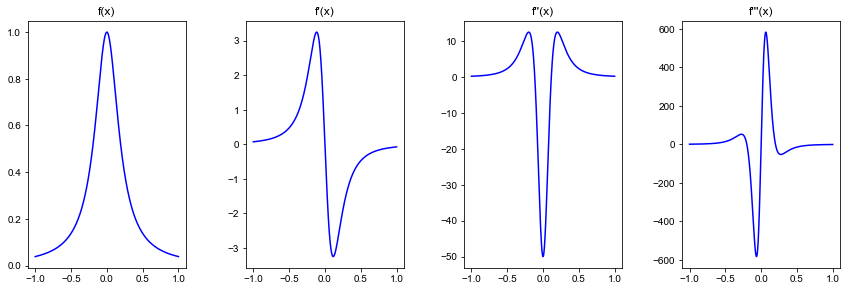

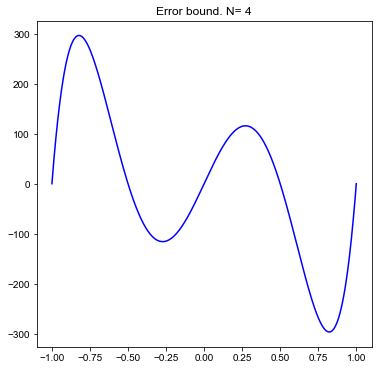

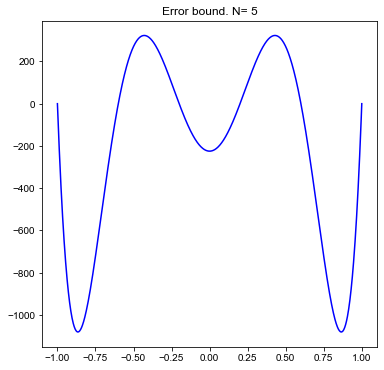

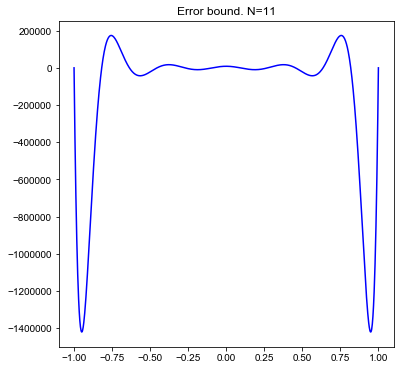

In [3]:
import sympy
from math import factorial

x = sympy.Symbol('x', real=True)
f = 1. / (1. + 25. * x**2)
print("f(x) = ", (sympy.simplify(f)))
f_ = sympy.lambdify(x,f)

dfdx = sympy.diff(f, x) 
print("f'(x) = ", (sympy.simplify(dfdx)))
dfdx_ = sympy.lambdify(x,dfdx)

dfdx2 = sympy.diff(dfdx, x) 
print("f''(x) = ", (sympy.simplify(dfdx2)))
dfdx2_ = sympy.lambdify(x,dfdx2)

dfdx3 = sympy.diff(dfdx2, x) 
print("f'''(x) = ", (sympy.simplify(dfdx3)))
dfdx3_ = sympy.lambdify(x,dfdx3)

xf = np.linspace(-1.0, 1.0, 1000)

fig, ax = plt.subplots(1, 4, figsize=(12, 4))
fig.tight_layout(w_pad=3, h_pad=4)
ax[0].plot(xf, f_(xf), 'b'); ax[0].set_title("f(x)")
ax[1].plot(xf, dfdx_(xf), 'b'); ax[1].set_title("f'(x)")
ax[2].plot(xf, dfdx2_(xf), 'b'); ax[2].set_title("f''(x)")
ax[3].plot(xf, dfdx3_(xf), 'b'); ax[3].set_title("f'''(x)")

N = 4
df = f
for i in range(N+1):
    df = sympy.diff(df, x) 

print("f^{(20)}(x) = ", (sympy.simplify(df)))
df_ = sympy.lambdify(x,df)
xi = np.linspace(-1, 1, N + 1)
Psi = np.prod([(xf - xi[i]) for i in range(N+1)], axis=0)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(xf, (1./factorial(N+1))*np.max(np.abs(df_(xf)))*Psi, 'b'); ax.set_title("Error bound. N={0:2d}".format(N))

N = 5
df = f
for i in range(N+1):
    df = sympy.diff(df, x) 

print("f^{(20)}(x) = ", (sympy.simplify(df)))
df_ = sympy.lambdify(x,df)
xi = np.linspace(-1, 1, N + 1)
Psi = np.prod([(xf - xi[i]) for i in range(N+1)], axis=0)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(xf, (1./factorial(N+1))*np.max(np.abs(df_(xf)))*Psi, 'b'); ax.set_title("Error bound. N={0:2d}".format(N))

N = 11
df = f
for i in range(N+1):
    df = sympy.diff(df, x) 

print("f^{(20)}(x) = ", (sympy.simplify(df)))
df_ = sympy.lambdify(x,df)
xi = np.linspace(-1, 1, N + 1)
Psi = np.prod([(xf - xi[i]) for i in range(N+1)], axis=0)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(xf, (1./factorial(N+1))*np.max(np.abs(df_(xf)))*Psi, 'b'); ax.set_title("Error bound. N={0:2d}".format(N))

## Homework - Chebyshev interpolation [$\star$]

Consider the cell in the lecture where we computed and plotted the Chebyshev interpolant using a call to `si.lagrange` (from inside the function `plot_approximation`), i.e. where the loop read

``` Python
for i, degree in enumerate(degrees):
    # the Chebyshev nodes
    xi = np.cos((2.0 * np.arange(1, degree+2) - 1.0) * np.pi / (2.0 * (degree+1)))
    # compute and plot the Lagrange polynomial using Chebyshev nodes as data locations
    plot_approximation(runge, xi, ax[i])
    ax[i].plot(xi, runge(xi), 'ko', label='data')
    ax[i].set_title('Degree %i' % degree, fontsize=12)
    ax[i].legend(loc='best', fontsize=12)
```

Recreate the four plots that resulted, but update the code (specifically our function `plot_approximation`) so that it instead calls our Lagrangian interpolation function `Lagrange_interp_poly`.

### Solution - Chebyshev interpolation

The key change here is really just to update

``` Python
    lp = si.lagrange(xi, f(xi))
    ax.plot(x, lp(x), 'b', label='approximation')
```

for 

``` Python
    L = Lagrange_interp_poly(xi, f(xi), x)
    ax.plot(x, L, 'b', label='approximation')
``` 

In [4]:
def Lagrange_basis_poly(xi, x):
    """Calculate Lagrange basis polynomials.
    
    xi is the x-component of the data
    
    x is the array of x-locations we want the polynomials evaluated at
    
    Returns l, the Lagrange polynomials evaluated at x,
    so l is an array of size (len(xi), len(x))
    """
    # we have N+1 data points, and so the polynomial degree N must be the length of xi minus 1
    N = len(xi) - 1
    # the Lagrange basis polynomials are a product, so let's initialise them with 1
    # (cf. for a summation where we would most likely initialise with zero)
    # we have N+1 of them, and we want their values at locations x, hence size (N+1)xlen(x)
    l = np.ones((N+1, len(x)))
    # we want to iterate over i ranging from zero to N
    for i in range(0, N+1):
        for m in range(0, N+1):
            if (m != i):
                l[i, :] = l[i, :]*(x - xi[m])/(xi[i] - xi[m])
    return l


def Lagrange_interp_poly(xi, yi, x):
    """Calculates Lagrange interpolation polynomial from N+1 data points.
    
    (xi, yi) are the N+1 data points (0, 1, ..., N)
    
    x is an array of x-locations the polynomial is evaluated at
    
    Returns L, the Lagrange interpolation polynomial evaluated at x
    """
    # first call our function above to calculate the individual basis functions l
    l = Lagrange_basis_poly(xi, x)
    print('len(xi), len(x), l.shape: ',len(xi), len(x), l.shape)
    # L is our Lagrange polynomial evaluated at the locations x
    L = np.zeros_like(x)
    for i in range(0, len(xi)):
        L = L + yi[i]*l[i]
    return L

len(xi), len(x), l.shape:  6 100 (6, 100)
len(xi), len(x), l.shape:  10 100 (10, 100)
len(xi), len(x), l.shape:  13 100 (13, 100)
len(xi), len(x), l.shape:  21 100 (21, 100)


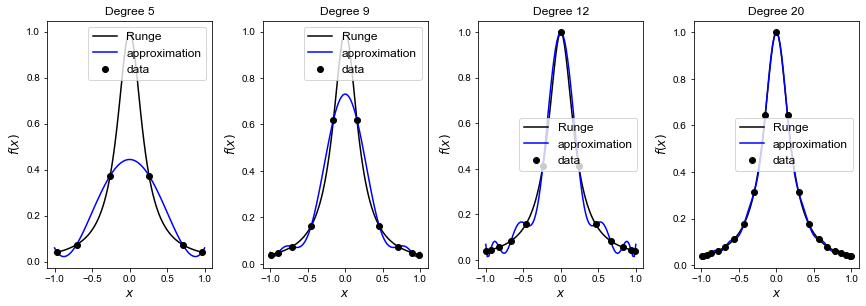

In [5]:
def runge(x):
    return 1.0 / (1.0 + 25.0 * x**2)


def plot_approximation2(f, xi, ax):
    x = np.linspace(-1.0, 1.0, 100)
    ax.plot(x, f(x), 'k', label='Runge')

    #lp = si.lagrange(xi, f(xi))
    L = Lagrange_interp_poly(xi, f(xi), x)
    ax.plot(x, L, 'b', label='approximation')

    ax.set_xlabel('$x$', fontsize=12)
    ax.set_ylabel('$f(x)$', fontsize=12)
    

degrees = [5, 9, 12, 20]

# set up our figs for plotting 
fig, ax = plt.subplots(1, len(degrees), figsize=(12, 4))
fig.tight_layout(w_pad=2)  # add some padding otherwise axes labels overlap

for i, degree in enumerate(degrees):
    # the Chebyshev nodes
    xi = np.cos((2.0 * np.arange(1, degree+2) - 1.0) * np.pi / (2.0 * (degree+1)))
    # compute and plot the Lagrange polynomial using Chebyshev nodes as data locations
    plot_approximation2(runge, xi, ax[i])
    ax[i].plot(xi, runge(xi), 'ko', label='data')
    ax[i].set_title('Degree %i' % degree, fontsize=12)
    ax[i].legend(loc='best', fontsize=12)


## Homework - Chebyshev polynomials as basis functions [$\star\star$]

Recall from lectures that the degree $N$ Lagrange polynomial interpolating $N+1$ data points is given by

$$L(x) := \sum_{i=0}^{N} y_i \ell_i(x),$$

where the $\ell_i(x)$ are the Lagrange basis functions defined by

$$\ell_i(x) := \prod_{\begin{smallmatrix}0\le m\le N\\ m\neq i\end{smallmatrix}} \frac{x-x_m}{x_i-x_m},$$

[note that each of these basis functions is itself a degree $N$ polynomial].

A general result is the following:

If the $N+1$ data locations, $x_0 < x_1 < \ldots < x_N,$ are the roots of some (N+1) degree polynomial $\phi_{N+1}(x)$  (from an [*orthogonal family* of polynomials](https://en.wikipedia.org/wiki/Orthogonal_polynomials), e.g. the [*Chebyshev polynomials*](https://en.wikipedia.org/wiki/Chebyshev_polynomials)) we introduced in lecture and have a nice minimal error property, then the Lagrange basis functions are equivalent to 

$$\ell_i(x) \equiv \frac{\phi_{N+1}(x)}{(x - x_i)\phi'_{N+1}(x_i)},$$

where $\phi'$ is the derivative of $\phi$.  [See Chebyshev Polynomials, by J.C. Mason, D.C. Handscomb (Chapter 6)].

In the specific case we discussed in class where the $x_0 < x_1 < \ldots < x_N,$ are the roots of the Chebyshev polynomial (which was the choice which minimised the issue we had with interpolation of the Runge function) we have that the Lagrange basis functions are equivalent to

$$\ell_i(x) = \frac{T_{N+1}(x)}{(N+1)(x - x_i)U_{N}(x_i)},$$

where $T$ and $U$ are the Chebyshev polynomials of the first and second kind respectively, i.e. the Lagrange basis functions are equivalent to scaled Chebyshev polynomials.

Now of course we end up at the same final interpolating polynomial as we did with the standard Lagrange polynomial approach, but now the basis functions are not all degree $N$ polynomials (as we will see in the code and web links directly below).


Try updating our function `Lagrange_interp_poly` so that instead of calling the function `Lagrange_basis_poly` to compute the Lagrange basis functions using the expression at the top of this cell, it calls a new function which computes the basis functions in terms of the above formula involving Chebyshev polynomials of the first ($T$) and second ($U$) kind.  

You can use the recurrence relations defining these families of polynomials here: <https://en.wikipedia.org/wiki/Chebyshev_polynomials#Definition>

As a hint here is a function which computes the polynomial of the first kind (you'll need to code up the second kind yourself)

```Python 
def Chebyshev_first_kind(N, x):
    T = np.zeros((N+1, len(x)))
    T[0,:] = 1
    if N == 0:
        return T
    T[1,:] = x
    if N == 1:
        return T
    for n in range(2, N+1):
        T[n,:] = 2 * x * T[n-1,:] - T[n-2,:]
    return T
```

And as a further hint, in my solution I replace these lines from `Lagrange_interp_poly`

```Python
    l = Lagrange_basis_poly(xi, x)
    L = np.zeros_like(x)
    for i in range(0, len(xi)):
        L = L + yi[i]*l[i]
```

with 

```Python
    T = Chebyshev_first_kind(N+1, x)
    U = Chebyshev_second_kind(N, xi)
    Chebyshev_interpolant = np.zeros_like(x)
    for i in range(0, len(xi)):
        Chebyshev_interpolant = Chebyshev_interpolant  \
            + yi[i]*T[-1,:]/((N+1)*(x-xi[i])*U[-1,i])
```

I called the new function `Chebyshev_interp_poly`.


Test your answer by recreating the above plots of the approximation (obtained using `Lagrange_interp_poly`) to the Runge functions using `degrees = [5, 9, 12, 20]`.

### Solution - Chebyshev polynomials as basis functions

In [6]:
def Chebyshev_first_kind(N, x):
    T = np.zeros((N+1, len(x)))
    T[0,:] = 1
    if N == 0:
        return T
    T[1,:] = x
    if N == 1:
        return T
    for n in range(2, N+1):
        T[n,:] = 2 * x * T[n-1,:] - T[n-2,:]
    return T

def Chebyshev_second_kind(N, x):
    U = np.zeros((N+1, len(x)))
    U[0,:] = 1
    if N == 0:
        return U
    U[1,:] = 2*x
    if N == 1:
        return U
    for n in range(2, N+1):
        U[n,:] = 2 * x * U[n-1,:] - U[n-2,:]
    return U

def Chebyshev_interp_poly(xi, yi, x):
    N = len(xi)-1
    T = Chebyshev_first_kind(N+1, x)
    U = Chebyshev_second_kind(N, xi)
    Chebyshev_interpolant = np.zeros_like(x)
    for i in range(0, len(xi)):
        Chebyshev_interpolant = Chebyshev_interpolant  \
            + yi[i]*T[-1,:]/((N+1)*(x-xi[i])*U[-1,i])
    return Chebyshev_interpolant

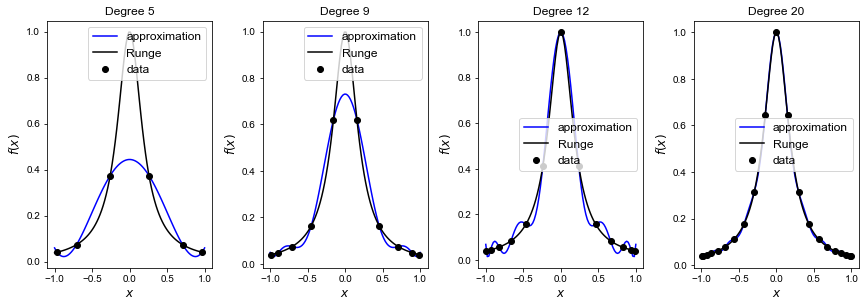

In [7]:
degrees = [5, 9, 12, 20]

# set up our figs for plotting 
fig, ax = plt.subplots(1, len(degrees), figsize=(12, 4))
fig.tight_layout(w_pad=2)  # add some padding otherwise axes labels overlap

for i, degree in enumerate(degrees):
    # the Chebyshev nodes
    xi = np.cos((2.0 * np.arange(1, degree+2) - 1.0) * np.pi / (2.0 * (degree+1)))
    yi = runge(xi)
    x = np.linspace(-1.,1.,100)
    Chebyshev_interpolant = Chebyshev_interp_poly(xi, yi, x)
    ax[i].plot(x, Chebyshev_interpolant, 'b', label='approximation')
    ax[i].plot(x, runge(x), 'k', label='Runge')
    ax[i].plot(xi, runge(xi), 'ko', label='data')
    ax[i].set_title('Degree %i' % degree, fontsize=12)
    ax[i].legend(loc='best', fontsize=12)
    ax[i].set_xlabel('$x$', fontsize=12)
    ax[i].set_ylabel('$f(x)$', fontsize=12)

## Homework - Cubic spline interpolation [$\star\star$]

Write some code to implement and plot a cubic spline and recreate the figure from class obtained using SciPy, based on the theory below. If you get this right and if you do a little bit of extrapolation outside our data range then you will see that the behaviour here does not quite agree with SciPy. Read the SciPy docs to see why this is (consider the default boundary conditions) and redo the SciPy plot to agree with your code.

### Cubic spline -  derivation

[See Elementary Numerical Analysis by Kendall Atkinson page 132 and Kiusalaas page 121].

There are a few different ways to derive a linear system which can be solved for the unknowns to prescribe a cubic spline. The Wikipedia entry for example formulates the problem such that it leads to a linear system for $k$ defined as the first derivatives of the spline. Here we follow a derivation where we define $k$ to the the second derivatives (or curvatures) of the spline (Atkinson uses the notation $M$ for these curvatures; Moin uses $g''$ in the text and gpp in code).

Recall we cubic splines we are looking for a curve $y = f(x)$ which is cubic between the data points (the knots), and whose first and second derivatives are continuous across the knots.

Use the notation $f_{i,i+1}(x)$ to denote this cubic in the interval between knot $i$ and $i+1$ (for $i = 0, \ldots, n-1$), so

$$ f_{i,i+1}(x) = \alpha + \beta x + \gamma x^2 + \delta x^3,$$

with different constants ($\alpha,\beta,\gamma,\delta$) in each interval.

Introduce the notation $k_i$ for the second derivative of the (overall) spline at knot $i$, then by continuity of second derivatives across $knots$, the second derivatives of $f_{i-1,i}$ and $f_{i,i+1}$ at their common knot $x_i$ must be equal,
and this value is $k_i$:

$$ k_i = f''_{i-1,i}(x) = f''_{i,i+1}(x), \;\;\;\; \text{for} \;\;\;\;\; i=1,\ldots, n-1.$$

In the case of *natural* splines we use the boundary at the end point of the domain

$$ k_0 = k_n = 0.$$

Now since $f$ is cubic, we know that $f''(x)$ must be p/w linear and continuous, i.e. on each subinterval $f''_{i,i+1}(x)$ is linear and completely defined by its values at the two knots either end of that interval ($k_i$ and $k_{i+1}$). We can use Lagrange interpolation to write this as 

$$ f''_{i,i+1}(x) = k_i\ell_i(x) + k_{i+1}\ell_{i+1}(x),$$

where the Lagrange basis polynomials are (see the cell on linear interpolation in L1)

$$ \ell_i(x) = \frac{x - x_{i+1}}{x_i-x_{i+1}}, \;\;\;\;\;\;\;\;  \ell_{i+1}(x) = \frac{x - x_i}{x_{i+1}-x_i}. $$

Hence, 

$$ f''_{i,i+1}(x) = \frac{ k_i(x - x_{i+1}) + k_{i+1}(x - x_i) }{x_i-x_{i+1}}.$$

If we integrate this linear expression up twice with respect to $x$ we get

$$ f_{i,i+1}(x) = \frac{ k_i(x - x_{i+1})^3 - k_{i+1}(x - x_i)^3 }{6(x_i-x_{i+1})} + C_1 x + C_2,$$

where $C_1$ and $C_2$ are two arbitrary constants of integration. The way to check this is to see that if we differentiate this twice those two terms with the constants disappear, and the first term when integrated twice does indeed give us the term on the LHS of our expression for $ f''_{i,i+1}(x) $.

Now note we can also write the extra $C_1 x + C_2$ terms in the form $A(x - x_{i+1}) - B(x - x_i)$, where we have simply redefined that constants via $C_1=A-B$ and $C_2 = -Ax_{i+1} - Bx_i$. We can do this as the constants are arbitrary at this stage, and this will prove more convenient in what follows.

If you're confused about this just note that 

$$ f_{i,i+1}(x) = \frac{ k_i(x - x_{i+1})^3 - k_{i+1}(x - x_i)^3 }{6(x_i-x_{i+1})} + A(x - x_{i+1}) - B(x - x_i),$$

for arbitrary constants $A$ and $B$ also differentiates twice to our desired expression for $ f''_{i,i+1}(x)$.

So, along with the $k_i$'s being unknown at this stage, we also have two arbitrary constants on integration left to find: $A$ and $B$ (and note there is a different set of these for every interval $i=0,\ldots, n-1$).

But we have more information to impose. The first is that the spline passes through the data:

$$ y_i = f_{i,i+1}(x_i) = \frac{ k_i(x_i - x_{i+1})^3 }{6(x_i-x_{i+1})} + A(x_i - x_{i+1}), $$

and so rearranging

$$ A = \frac{y_i}{x_i - x_{i+1}} - \frac{k_i}{6}(x_i - x_{i+1}). $$

Similarly

$$ y_{i+1} = f_{i,i+1}(x_{i+1}) = \frac{ - k_{i+1}(x_{i+1} - x_i)^3 }{6(x_i-x_{i+1})} - B(x_{i+1} - x_i), $$

which rearranging yields

$$ B = \frac{y_{i+1}}{x_{i} - x_{i+1}} - \frac{k_{i+1}}{6}(x_i - x_{i+1}). $$

Substituting these expressions for $A$ and $B$ back into our expression above for $ f_{i,i+1}(x) $ yields the following expression for the cubic spline over each subinterval:

$$ f_{i,i+1}(x) = \frac{k_i}{6}\left( \frac{ (x - x_{i+1})^3 }{x_i-x_{i+1}} - (x - x_{i+1})(x_i - x_{i+1}) \right)
-  \frac{k_{i+1}}{6}\left( \frac{ (x - x_{i})^3 }{x_i-x_{i+1}} - (x - x_{i})(x_i - x_{i+1}) \right)
+ \frac{y_i(x - x_{i+1}) - y_{i+1}(x - x_{i})}{x_i - x_{i+1}}.$$

[See Atkinson (5.68) and Kiusalaas (3.10)].

This is the expression for the cubic spline we implement over each subinterval, once we know values for the curvatures at the knots at either end of the subinterval, i.e. $k_i$ and $k_{i+1}$.

The final piece of information we have to apply to find these values is continuity of the first derivatives of the spline across the knots: 

$$ f'_{i-1,i}(x_i) = f'_{i,i+1}(x_i), \;\;\;\;\;\text{for}\;\;\;\;\;\; i=1, \ldots, n-1.$$

Substituting in our expression for $f_{i,i+1}(x)$ containing only the unknowns $k$'s,
Atkinson and Kiusalaas agree that after "a great deal of simplification" we arrive at the system of linear/simultaneous equations

$$(x_{i-1} - x_{i})k_{i-1} + 2(x_{i-1} - x_{i+1})k_i + (x_{i} - x_{i+1})k_{i+1} = 6\left( \frac{y_{i-1} - y_{i}}{x_{i-1} - x_{i}} - \frac{y_{i} - y_{i+1}}{x_{i} - x_{i+1}}  \right),  \;\;\;\;\;\text{for}\;\;\;\;\;\; i=1, \ldots, n-1.$$

We can formulate this as an $n-1$ by $n-1$ linear system, solve for $k_1, \ldots, k_{n-1}$, combine with the natural boundary conditions $k_0=k_n=0$, and substitute these values into our expression for $f_{i,i+1}(x)$ and we are done.

The final step when given a new data location, $x$, to evaluate the cubic spline at is to identify which subinterval we are in, and hence which two $k$ values to use. Note that if you want your code to do some extrapolation (as we did in the plots in class - we plotted over $[0.4, 9.1]$ even though our data we only over  $[0.4, 9]$) you will need to treat data outside all subintervals as a special case.

### Solution - Cubic spline interpolation

Let's first see what SciPy's implementation gives us.

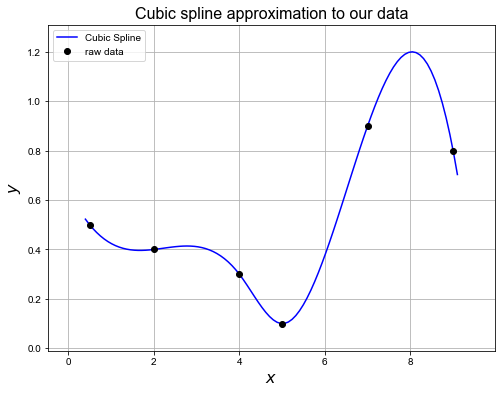

In [8]:
# This is the cell and the corresponding plots we are trying to recreate.

xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

# use SciPy to compute the cubic spline
Pcs = si.CubicSpline(xi, yi)

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

x = np.linspace(0.4, 9.1, 100)

# Scipy actually formed a function Pcs for us that we need to evaluate at x to plot
ax1.plot(x, Pcs(x), 'b', label='Cubic Spline')

# Overlay raw data
plot_raw_data(xi, yi, ax1)
ax1.legend(loc='best')
ax1.set_title('Cubic spline approximation to our data', fontsize=16);

Write some functions to compute and then evaluate the cubic spline.

Note you could either solve the $n-1$ by $n-1$ tridiagonal system derived above and then add in the two natural BCs, or as here you can just formulate an $n+1$ by $n+1$ and add in the two additional equations $k_0=0$ and $k_n=0$ in the first and last row. 

In [9]:
def cubic_spline_k(xi, yi):
    """ Compute the second derivative values of the spline at the data location.
    """ 
    n = len(xi) - 1 # we have n+1 data points 
    # form the tridiagonal matrix for the k's
    del_x = np.diff(xi) # same as xi[1:] - xi[:-1]
    del_y = np.diff(yi)
    Amat = np.zeros((n+1,n+1))
    RHS = np.zeros(n+1)
    main_diag = np.zeros(n+1)
    lower_diag = np.zeros(n)
    upper_diag = np.zeros(n)
    main_diag[1:-1]  = 2. * (del_x[:-1] + del_x[1:])
    main_diag[0] = 1.
    main_diag[-1] = 1.
    lower_diag[:-1] = del_x[:-1]
    lower_diag[-1] = 0.
    upper_diag[1:] = del_x[1:]
    upper_diag[0] = 0.
    Amat = np.diag(lower_diag, -1) + np.diag(main_diag, 0) + np.diag(upper_diag, 1)  
    RHS[1:-1] = 6. * ( del_y[1:]/del_x[1:] - del_y[:-1]/del_x[:-1] )
    RHS[0] = 0.
    RHS[-1] = 0.
    # solve the linear system - see L3 for details
    k = np.linalg.solve(Amat, RHS)
    return k

# This is a little test to check our result with a solution from Kiusalaas
print('Test (Kiusalaas Ex. 3.7): ',np.allclose(cubic_spline_k(np.array([1,2,3,4,5]), np.array([0,1,0,1,0])), \
                           np.array([0.,-30./7.,36./7.,-30./7.,0.])))

Test (Kiusalaas Ex. 3.7):  True


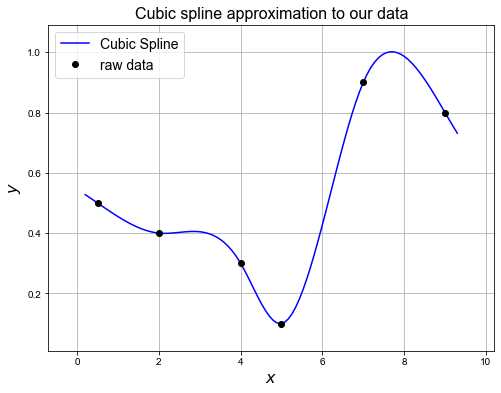

In [10]:
def evaluate_cubic_spline(xi,yi,xx):
    """ Construct the cubic spline passing through the points (xi,yi)
    with natural boundary conditions.
    
    Return the evaluation of the cubic spline at the locations in xx.
    """ 
    k = cubic_spline_k(xi,yi)
    yy = np.zeros_like(xx)
    # we have two options here, we could loop over the intervals and find and evaluate all xx locations 
    # within it, or instead loop over the xx values and for each find the interval. The former will likely
    # be more efficient, but the second perhaps simpler to understand and code - let's do the second!
    for n, x in enumerate(xx):
        # first find the interval this x lies within
        # first two conditionals here allow us to extrapolate
        if x < xi[0]:
            i = 0
        elif x > xi[-1]:
            i = len(xi) - 2
        else:
            i = np.argwhere(x<=xi)[0][0]-1
        h = xi[i] - xi[i+1]
        # actually evaluate the cubic
        yy[n] = ((x - xi[i+1])**3/h - (x - xi[i+1])*h)*k[i]/6.0 \
               - ((x - xi[i])**3/h - (x - xi[i])*h)*k[i+1]/6.0 \
               + (yi[i]*(x - xi[i+1]) - yi[i+1]*(x - xi[i]))/h
    return yy

# Now see if this recreates the figures obtained using SciPy
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

x = np.linspace(0.2, 9.3, 100)

# Plot our cubic spline
ax1.plot(x, evaluate_cubic_spline(xi,yi,x), 'b', label='Cubic Spline')

# Overlay raw data
plot_raw_data(xi, yi, ax1)
ax1.legend(loc='best', fontsize=14)
ax1.set_title('Cubic spline approximation to our data', fontsize=16);

If you look closely (at the end points) you will see that this doesn't quite agree with what we have from SciPy, but with a bit of thought and looking at the SciPy docs we see that the *natural* BC is not the default. We can ask SciPy to apply this BC instead and re-plot to show an identical result in the eyeball norm.

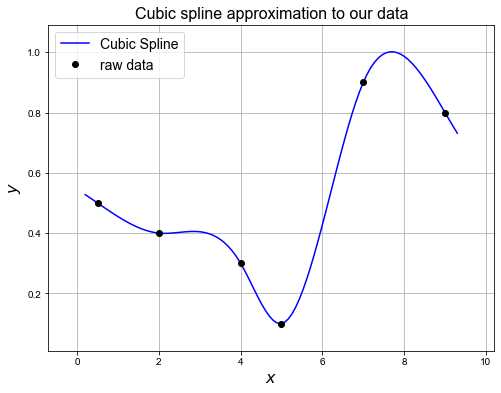

In [11]:
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

# use SciPy to compute the cubic spline
Pcs = si.CubicSpline(xi, yi, bc_type='natural')

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

x = np.linspace(0.2, 9.3, 100)

# Plot SciPy spline
ax1.plot(x, Pcs(x), 'b', label='Cubic Spline')

# Overlay raw data
plot_raw_data(xi, yi, ax1)
ax1.legend(loc='best', fontsize=14)
ax1.set_title('Cubic spline approximation to our data', fontsize=16);